In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee/employee_data.csv


In [2]:
df=pd.read_csv('/kaggle/input/employee/employee_data.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df=df.drop('customerID' , axis=1)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Churn']=label_encoder.fit_transform(df['Churn'])
df['gender']=label_encoder.fit_transform(df['gender'])
df['TotalCharges']=label_encoder.fit_transform(df['TotalCharges'])
df['Partner']=label_encoder.fit_transform(df['Partner'])
df['Dependents']=label_encoder.fit_transform(df['Dependents'])
df['PhoneService']=label_encoder.fit_transform(df['PhoneService'])
df['MultipleLines']=label_encoder.fit_transform(df['MultipleLines'])
df['InternetService']=label_encoder.fit_transform(df['InternetService'])
df['OnlineSecurity']=label_encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=label_encoder.fit_transform(df['OnlineBackup'])
df['StreamingMovies']=label_encoder.fit_transform(df['StreamingMovies'])
df['Contract']=label_encoder.fit_transform(df['Contract'])
df['PaperlessBilling']=label_encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=label_encoder.fit_transform(df['PaymentMethod'])
df['TechSupport']=label_encoder.fit_transform(df['TechSupport'])
df['StreamingTV']=label_encoder.fit_transform(df['StreamingTV'])
df['DeviceProtection']=label_encoder.fit_transform(df['DeviceProtection'])



In [7]:
x=df.iloc[: ,:-1]
y=df.iloc[: ,-1]
columns=x.columns
num_cols=x._get_numeric_data().columns
cols=list(set(columns)- set(num_cols))
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

input=ColumnTransformer([('encoding' ,OneHotEncoder() ,cols)] ,remainder='passthrough')
output=ColumnTransformer([('encoding' ,OneHotEncoder() ,['Churn']  )] )
X=input.fit_transform(df)
Y=output.fit_transform(df)
X=pd.DataFrame(X)
X.insert(0,'MonthlyCharges', df['MonthlyCharges'])
X.insert(1,'tenure', df['tenure'])
X.insert(0,'SeniorCitizen', df['SeniorCitizen'])
Y=pd.DataFrame(Y).iloc[: ,:-1]


In [8]:
X

,SeniorCitizen,MonthlyCharges,tenure,0,1,2,3,4,5,6,...,10,11,12,13,14,15,16,17,18,19
0,0,29.85,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,0,56.95,34,1.0,0.0,0.0,0.0,34.0,1.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,0,53.85,2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,0,42.30,45,1.0,0.0,0.0,0.0,45.0,0.0,1.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,0,70.70,2,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,24,1.0,0.0,1.0,1.0,24.0,1.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,0,103.20,72,0.0,0.0,1.0,1.0,72.0,1.0,2.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7040,0,29.60,11,0.0,0.0,1.0,1.0,11.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0.0
7041,1,74.40,4,1.0,1.0,1.0,0.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


In [9]:
Y

,0
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
7038,1.0
7039,1.0
7040,1.0
7041,0.0


In [10]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
X=scaler.fit_transform(X)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [11]:
X

array([[0.        , 0.11542289, 0.01388889, ..., 0.11542289, 0.38361409,
        0.        ],
       [0.        , 0.38507463, 0.47222222, ..., 0.38507463, 0.2245023 ,
        0.        ],
       [0.        , 0.35422886, 0.02777778, ..., 0.35422886, 0.02404288,
        1.        ],
       ...,
       [0.        , 0.11293532, 0.15277778, ..., 0.11293532, 0.45849923,
        0.        ],
       [1.        , 0.55870647, 0.05555556, ..., 0.55870647, 0.40735069,
        1.        ],
       [0.        , 0.86965174, 0.91666667, ..., 0.86965174, 0.8280245 ,
        0.        ]])

In [12]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test =train_test_split(X ,Y ,test_size=0.3)

In [13]:
from sklearn import tree
clf =tree.DecisionTreeClassifier(criterion='entropy' ,min_samples_split=2)
clf.fit(x_train , y_train)
y_pred=clf.predict(x_test)

In [14]:
print('y_test' ,y_test)


y_test         0
6531  1.0
1605  1.0
5645  1.0
3670  1.0
464   1.0
...   ...
1004  1.0
6887  1.0
4571  1.0
5107  1.0
2867  1.0

[2113 rows x 1 columns]


In [15]:
print("y_pred",y_pred)

y_pred [1. 1. 1. ... 1. 1. 1.]


In [16]:
from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier()
clf.fit(x_train , y_train)
y_pred=clf.predict(x_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
cm=confusion_matrix(y_test , y_pred)
print(cm)

[[ 537    0]
 [   0 1576]]


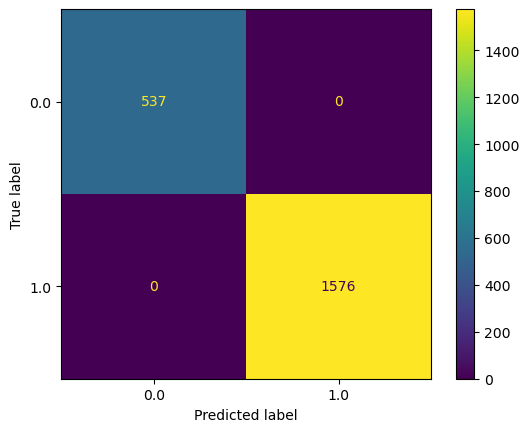

In [18]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=clf.classes_)
import matplotlib.pyplot as plt
disp.plot()
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(clf ,x_train , y_train ,cv=3)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [20]:
acc=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print('accuracy= '+str(acc) )

accuracy= 1.0
